<a href="https://colab.research.google.com/github/mellysr/teknokent/blob/main/proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# California Housing veri setini yükleme
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["MedHouseVal"] = data.target  # Hedef değişken

In [ ]:
# Bağımsız ve bağımlı değişkenleri ayırma
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

In [ ]:
# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)


In [ ]:
# Ridge modeli ve hiperparametre optimizasyonu
ridge_model = Ridge()
params = {
    "alpha": [0.1, 0.5, 1, 0.01],
    "solver": ['svd', 'auto', 'lsqr'],
    "max_iter": [100, 200, 300, 400, 500, 1000],
}


In [ ]:
ridge_cv = GridSearchCV(ridge_model, params, cv=3, n_jobs=-1, verbose=2)
ridge_cv.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1, 0.01],
                         'max_iter': [100, 200, 300, 400, 500, 1000],
                         'solver': ['svd', 'auto', 'lsqr']},
             verbose=2)

In [ ]:
# En iyi parametreler ile Ridge modelini tekrar eğitme
alpha_ = ridge_cv.best_params_["alpha"]
solver_ = ridge_cv.best_params_["solver"]
max_iter_ = ridge_cv.best_params_["max_iter"]

In [ ]:
ridge_tuned = Ridge(alpha=alpha_, solver=solver_, max_iter=max_iter_)
ridge_tuned.fit(X_train, y_train)


Ridge(alpha=1, max_iter=100)

In [ ]:
# Model tahminleri
predictions = ridge_tuned.predict(X_test)

In [ ]:
# Performans metrikleri
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, predictions)
r2_score_ = r2_score(y_test, predictions)

In [ ]:
print("\nMetrik Sonuçları\n")
print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAE:", MAE)
print("R2 Skoru:", r2_score_)



Metrik Sonuçları

MSE: 0.4988242584973926
RMSE: 0.7062749170807304
MAE: 0.5185744887923511
R2 Skoru: 0.6129886772948113



Bağımsız Değişkenlerin Önem Sıralaması



<Axes: >

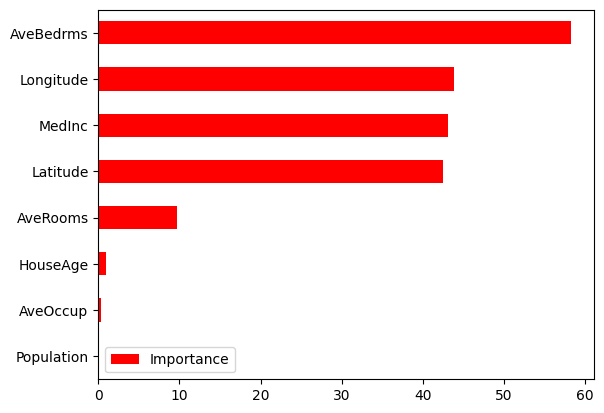

In [ ]:
# Özellik önem sırası
print("\nBağımsız Değişkenlerin Önem Sıralaması\n")
importance = pd.DataFrame({"Importance": np.abs(ridge_tuned.coef_) * 100},
                          index=X_train.columns)
importance.sort_values(by="Importance", ascending=True).plot(kind="barh", color="r")


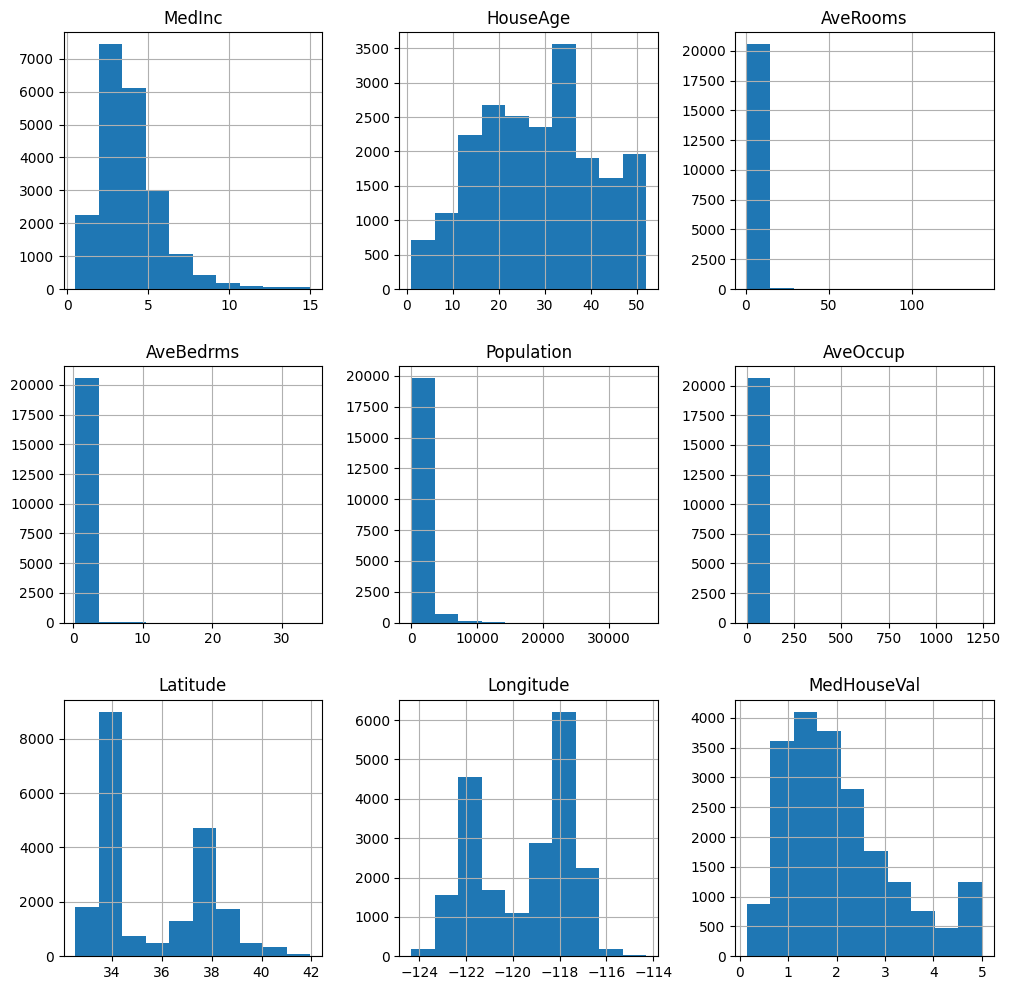

In [ ]:
# Histogram grafiği
df.hist(figsize=(12, 12))
plt.show()